# Assignment 1 - Coupled Pendula 
## Shamit Mani z5157509

### Introduction and Theory
The purpose of this report is to investigate some of the physical characteristics of coupled pendula. A single pendulum swings about its pivot point with a frequency of $\frac{1}{2\pi}\sqrt{\frac{g}{L}}$, where $g$ is gravitational acceleration and $L$ is the length from the pivot point to the mass at the end of the pendulum. In this analysis we assume the mass of the rod connecting the swinging mass to the pivot point is negligible compared to the mass at the end of the rod. 

A coupled pendula system consists of two (or more) pendula that are connected by a spring. As one pendulum swings, the motion can stretch or compress the spring, which in turn applies a force to the next pendulum. Hence, energy can be transferred between pendula. 

The coupled differential equations that characterise the motion of the pendula are:

$$ mL^{2}\ddot{\phi_1} + mgL\phi_1 = -kl(\phi_1 - \phi_2) \quad (1)$$ 
$$ mL^{2}\ddot{\phi_2} + mgL\phi_2 = kl(\phi_1 - \phi_2) \quad (2)$$ 

As we begin our analysis and attempt at finding a solution to these equations, we first import the necessaey libraries. 

In [237]:
from scipy.integrate import odeint
import scipy as sp
import scipy.fftpack
import numpy as np
import matplotlib.pyplot as plt

Let's define the constants in the equations. The length of total pivot arm in the PHYS3112 lab was $1$ metre, the mass at the end was $1$ kg, and the spring constant was experimentally determined to be $2.71$ N/m. Initially, we will let the spring be situated $0.2$ metres along the length of the pivot arm.

In [238]:
#Define parameters of the system
k = 2.71 #spring constant (N/m)
l = 0.15 #length  of moment arm (m)
m = 1.0 #mass of the pendula weights (kg)
L = 1.0 #total length of the pendulum from pivot point to point mass (m)
g = 9.81 #gravitatonal acceleration (m/s^2)

Let's define some parameters and name them $\alpha$ and $\beta$ to simplify our equations.
$$\alpha = \frac{k^{2}l^{2}}{mL^{2}},$$
and
$$\beta = \frac{g}{L}.$$

Rearranging our equations to,
$$\ddot{\phi_1} = \alpha\phi_2 - (\beta+\alpha)\phi_1 \qquad (1)$$

$$\ddot{\phi_2} = \alpha\phi_1 - (\beta + \alpha)\phi_2 \qquad (2)$$

In [239]:
alpha = (k*k*l*l)/(m*L*L)
beta = g/L

Next, we can convert the two second order differential equations into four first order differential equations, which is necessary in order to use the ODEint solver. 

$$\dot{\phi_1} = v_1,$$

$$\dot{v_1} = \alpha\phi_2 - (\beta+\alpha)\phi_1,$$

$$\dot{\phi_2} = v_2,$$

$$\dot{v_2} = (\alpha - \beta)\phi_1 - \alpha\phi_2.$$

Before we can begin solving the differential equations, we have to create a function that takes in the initial conditions of our system, time values, and any other constants, and returns system of linear ODEs defined above.

In [240]:
def f(y, t, alpha, beta):
    phi1, v1, phi2, v2 = y
    
    dph1dt = v1
    dv1dt = (alpha*phi2) - (phi1*alpha) - (phi1*beta)
    dph2dt = v2
    dv2dt = (alpha*phi1) - (alpha+beta)*phi2
    return [dph1dt, dv1dt, dph2dt, dv2dt]

Next we can create a time base, a series of points corresponding to different time intervals, which will allow us to plot the solution over a given time period. We will let the total time duration be large, as the longer the pendula swing, the more data can be processed and the fourier transform will be more accurate. 

In [241]:
#Set up parameters for integration
#Time base
timestep = 0.01
duration = 250 #Total duration of the 'experiment' in seconds. A longer duration increases the accuracy of the FFt
timebase = np.arange(duration//timestep)*timestep

Now let's find a solution. The second argument of the odeint function refers to the inital conditions;

[Initial position of first pendula, initial velocity of first pendula, initial position of second pendula, initial velocity of second pendula]

There are three modes of frequency for a system of two coupled pendula. The in phase mode where both pendula have the same starting value for position, $\phi_1(0) = \phi_2(0)$, the out of phase mode where the pendula have opposite positions, $\phi_1(0) = -\phi_2(0)$, and the beat mode, where one pendulum is at equilibrium and one is positioned ready to start swinging, $\phi_1(0) \neq 0, \phi_2(0) = 0.$

In [242]:
solution_inphase = odeint(f, [0.1,0.0,0.1,0.0], timebase, args = (alpha,beta))

We can take the Fourier transform of our solution and determine the peak frequency present in the signal. (Note: following code is adapted from PHYS3112 Tutorial 3 by Thomas Dixon)

In [243]:
#Fourier Transform

num_samples = int(duration/timestep) + 1
t_base = np.linspace(0, duration, num_samples)
X = sp.fftpack.fft(solution_inphase[:,0])
freq_base = sp.fftpack.fftfreq(num_samples, d=timestep)

X = np.abs(X)
X = np.copy(X[:num_samples//2])
freq_base = np.copy(freq_base[:num_samples//2])

Finally, let's plot the in phase solutions and the Fourier transform.

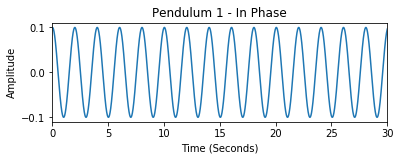

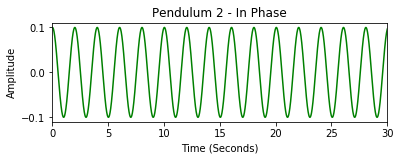

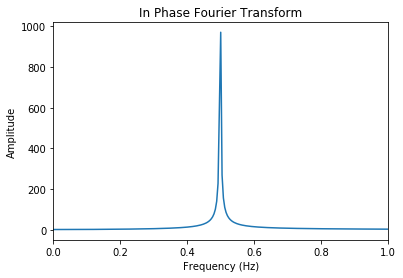

In [244]:
plt.figure(1)
plt.subplot(211)
axes = plt.gca()
axes.set_xlim([0,30]) #We choose to only show a small duration of the signal, in order to visualise more clearly
plt.plot(timebase, solution_inphase[:,0])
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('Pendulum 1 - In Phase')
plt.show()

plt.subplot(212)
axes = plt.gca()
axes.set_xlim([0,30])
plt.plot(timebase, solution_inphase[:,2], 'g')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('Pendulum 2 - In Phase')
plt.show()

axes = plt.gca()
axes.set_xlim([0,1])
plt.plot(freq_base, X)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('In Phase Fourier Transform')
plt.show()

Repeating this procedure for the out of phase initial condtions.

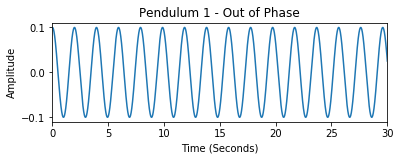

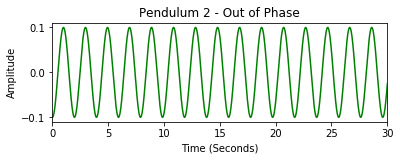

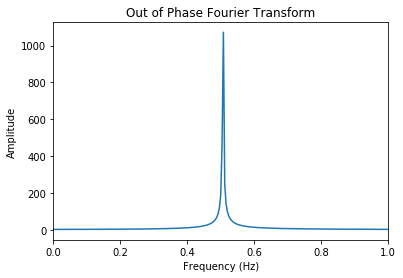

In [245]:
solution_outofphase = odeint(f, [0.1, 0.0, -0.1, 0.0], timebase, args = (alpha,beta))

plt.figure(1)
plt.subplot(211)
axes = plt.gca()
axes.set_xlim([0,30]) 
plt.plot(timebase, solution_outofphase[:,0])
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('Pendulum 1 - Out of Phase')
plt.show()

plt.subplot(212)
axes = plt.gca()
axes.set_xlim([0,30])
plt.plot(timebase, solution_outofphase[:,2], 'g')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('Pendulum 2 - Out of Phase')
plt.show()

X = sp.fftpack.fft(solution_outofphase[:,0])
freq_base = sp.fftpack.fftfreq(num_samples, d=timestep)

X = np.abs(X)
X = np.copy(X[:num_samples//2])
freq_base = np.copy(freq_base[:num_samples//2])

axes = plt.gca()
axes.set_xlim([0,1])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Out of Phase Fourier Transform')
plt.plot(freq_base, X)
plt.show()

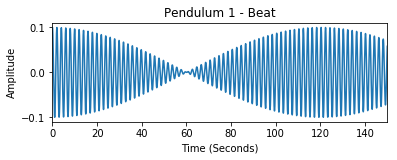

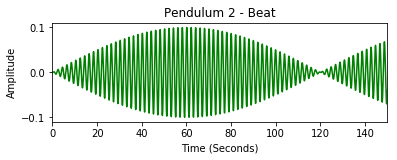

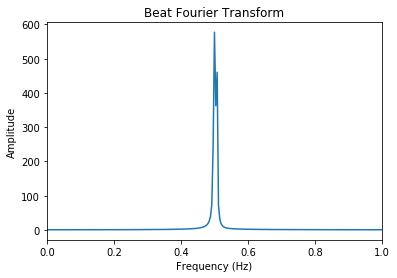

In [246]:
solution_beat = odeint(f, [0.1, 0.0, 0.0, 0.0], timebase, args = (alpha,beta))
plt.figure(1)
plt.subplot(211)
axes = plt.gca()
axes.set_xlim([0,150])
plt.plot(timebase, solution_beat[:,0])
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('Pendulum 1 - Beat')
plt.show()

plt.subplot(212)
axes = plt.gca()
axes.set_xlim([0,150])
plt.plot(timebase, solution_beat[:,2], 'g')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('Pendulum 2 - Beat')
plt.show()

X = sp.fftpack.fft(solution_beat[:,2])
freq_base = sp.fftpack.fftfreq(num_samples, d=timestep)

X = np.abs(X)
X = np.copy(X[:num_samples//2])
freq_base = np.copy(freq_base[:num_samples//2])

axes = plt.gca()
axes.set_xlim([0,1])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Beat Fourier Transform')
plt.plot(freq_base, X)
plt.show()

## Varying the position of the spring along the pivot arm
Let's repeat this process, this time varying the position of the spring along the pivot arm, and comparing the results.

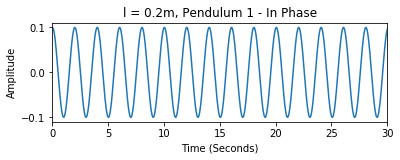

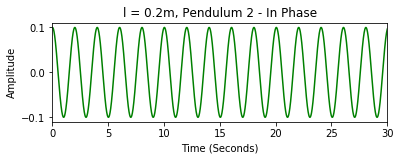

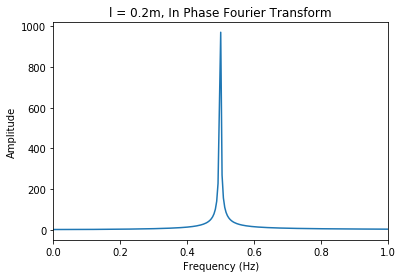

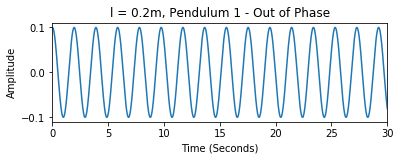

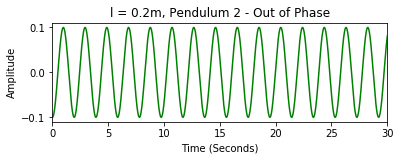

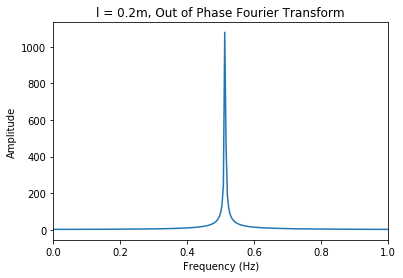

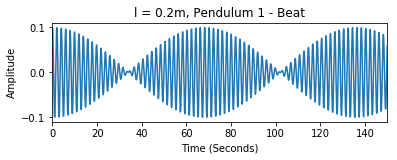

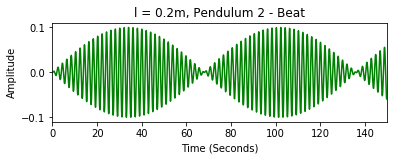

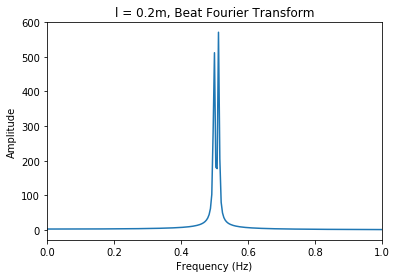

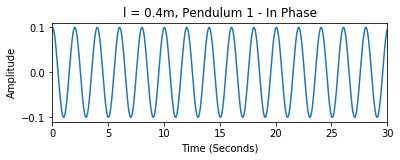

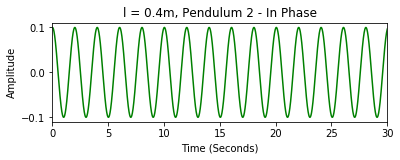

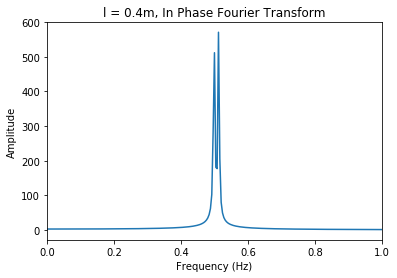

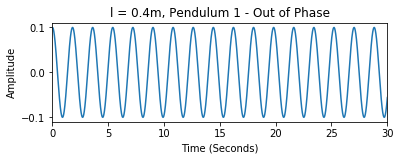

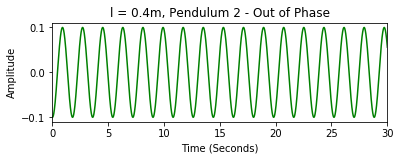

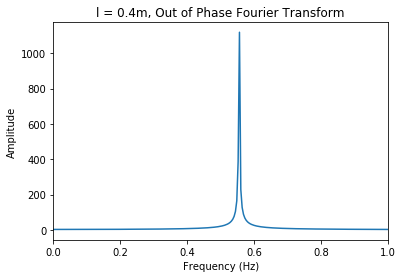

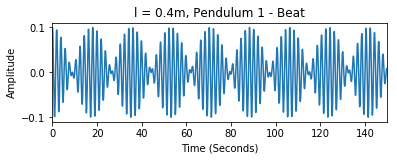

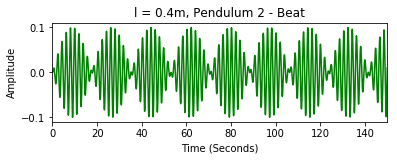

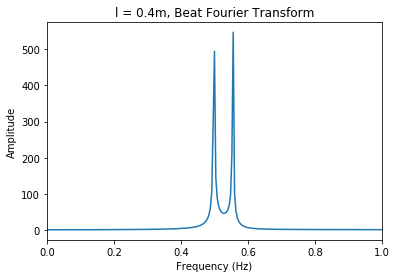

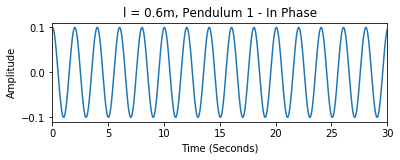

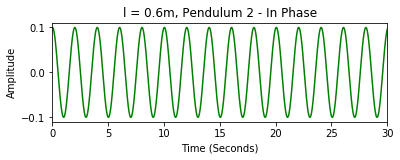

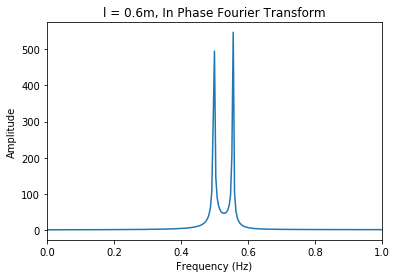

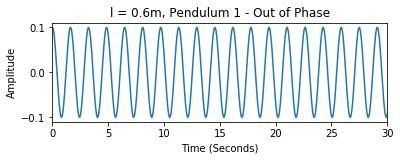

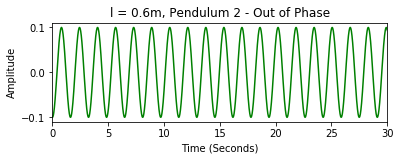

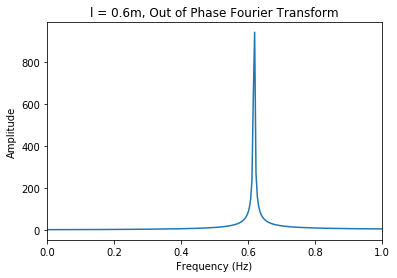

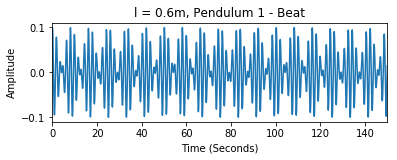

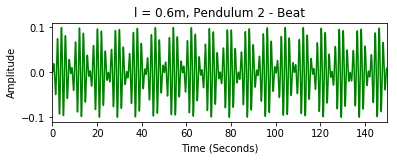

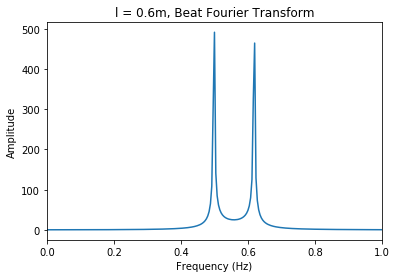

In [247]:
#l = 0.2 metres


l = 0.2 # (metres)
alpha = (k*k*l*l)/(m*L*L)
beta = g/L

def f(y, t, alpha, beta):
    phi1, v1, phi2, v2 = y
    
    dph1dt = v1
    dv1dt = (alpha*phi2) - (phi1*alpha) - (phi1*beta)
    dph2dt = v2
    dv2dt = (alpha*phi1) - (alpha+beta)*phi2
    return [dph1dt, dv1dt, dph2dt, dv2dt]

# l = 0.2 metres, In Phase
solution_inphase = odeint(f, [0.1,0.0,0.1,0.0], timebase, args = (alpha,beta))
plt.figure(1)
plt.subplot(211)
axes = plt.gca()
axes.set_xlim([0,30]) 
plt.plot(timebase, solution_inphase[:,0])
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('l = 0.2m, Pendulum 1 - In Phase')
plt.show()

plt.subplot(212)
axes = plt.gca()
axes.set_xlim([0,30])
plt.plot(timebase, solution_inphase[:,2], 'g')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('l = 0.2m, Pendulum 2 - In Phase')
plt.show()

X = sp.fftpack.fft(solution_inphase[:,0])
freq_base = sp.fftpack.fftfreq(num_samples, d=timestep)

X = np.abs(X)
X = np.copy(X[:num_samples//2])
freq_base = np.copy(freq_base[:num_samples//2])

axes = plt.gca()
axes.set_xlim([0,1])
plt.plot(freq_base, X)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('l = 0.2m, In Phase Fourier Transform')
plt.show()

# l = 0.2 metres, Out of Phase
solution_outofphase = odeint(f, [0.1, 0.0, -0.1, 0.0], timebase, args = (alpha,beta))

plt.figure(1)
plt.subplot(211)
axes = plt.gca()
axes.set_xlim([0,30]) 
plt.plot(timebase, solution_outofphase[:,0])
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('l = 0.2m, Pendulum 1 - Out of Phase')
plt.show()

plt.subplot(212)
axes = plt.gca()
axes.set_xlim([0,30])
plt.plot(timebase, solution_outofphase[:,2], 'g')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('l = 0.2m, Pendulum 2 - Out of Phase')
plt.show()

X = sp.fftpack.fft(solution_outofphase[:,0])
freq_base = sp.fftpack.fftfreq(num_samples, d=timestep)

X = np.abs(X)
X = np.copy(X[:num_samples//2])
freq_base = np.copy(freq_base[:num_samples//2])

axes = plt.gca()
axes.set_xlim([0,1])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('l = 0.2m, Out of Phase Fourier Transform')
plt.plot(freq_base, X)
plt.show()

# l = 0.2 metres, Beat

solution_beat = odeint(f, [0.1, 0.0, 0.0, 0.0], timebase, args = (alpha,beta))

plt.figure(1)
plt.subplot(211)
axes = plt.gca()
axes.set_xlim([0,150])
plt.plot(timebase, solution_beat[:,0])
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('l = 0.2m, Pendulum 1 - Beat')
plt.show()

plt.subplot(212)
axes = plt.gca()
axes.set_xlim([0,150])
plt.plot(timebase, solution_beat[:,2], 'g')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('l = 0.2m, Pendulum 2 - Beat')
plt.show()

X = sp.fftpack.fft(solution_beat[:,2])
freq_base = sp.fftpack.fftfreq(num_samples, d=timestep)

X = np.abs(X)
X = np.copy(X[:num_samples//2])
freq_base = np.copy(freq_base[:num_samples//2])

axes = plt.gca()
axes.set_xlim([0,1])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('l = 0.2m, Beat Fourier Transform')
plt.plot(freq_base, X)
plt.show()


#l = 0.4 metres

l = 0.4 # (metres)
alpha = (k*k*l*l)/(m*L*L)
beta = g/L

def f(y, t, alpha, beta):
    phi1, v1, phi2, v2 = y
    
    dph1dt = v1
    dv1dt = (alpha*phi2) - (phi1*alpha) - (phi1*beta)
    dph2dt = v2
    dv2dt = (alpha*phi1) - (alpha+beta)*phi2
    return [dph1dt, dv1dt, dph2dt, dv2dt]

# l = 0.4 metres, In Phase
solution_inphase = odeint(f, [0.1,0.0,0.1,0.0], timebase, args = (alpha,beta))
plt.figure(1)
plt.subplot(211)
axes = plt.gca()
axes.set_xlim([0,30]) 
plt.plot(timebase, solution_inphase[:,0])
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('l = 0.4m, Pendulum 1 - In Phase')
plt.show()

plt.subplot(212)
axes = plt.gca()
axes.set_xlim([0,30])
plt.plot(timebase, solution_inphase[:,2], 'g')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('l = 0.4m, Pendulum 2 - In Phase')
plt.show()

axes = plt.gca()
axes.set_xlim([0,1])
plt.plot(freq_base, X)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('l = 0.4m, In Phase Fourier Transform')
plt.show()

# l = 0.4 metres, Out of Phase
solution_outofphase = odeint(f, [0.1, 0.0, -0.1, 0.0], timebase, args = (alpha,beta))

plt.figure(1)
plt.subplot(211)
axes = plt.gca()
axes.set_xlim([0,30]) 
plt.plot(timebase, solution_outofphase[:,0])
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('l = 0.4m, Pendulum 1 - Out of Phase')
plt.show()

plt.subplot(212)
axes = plt.gca()
axes.set_xlim([0,30])
plt.plot(timebase, solution_outofphase[:,2], 'g')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('l = 0.4m, Pendulum 2 - Out of Phase')
plt.show()

X = sp.fftpack.fft(solution_outofphase[:,0])
freq_base = sp.fftpack.fftfreq(num_samples, d=timestep)

X = np.abs(X)
X = np.copy(X[:num_samples//2])
freq_base = np.copy(freq_base[:num_samples//2])

axes = plt.gca()
axes.set_xlim([0,1])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('l = 0.4m, Out of Phase Fourier Transform')
plt.plot(freq_base, X)
plt.show()

# l = 0.4 metres, Beat

solution_beat = odeint(f, [0.1, 0.0, 0.0, 0.0], timebase, args = (alpha,beta))

plt.figure(1)
plt.subplot(211)
axes = plt.gca()
axes.set_xlim([0,150])
plt.plot(timebase, solution_beat[:,0])
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('l = 0.4m, Pendulum 1 - Beat')
plt.show()

plt.subplot(212)
axes = plt.gca()
axes.set_xlim([0,150])
plt.plot(timebase, solution_beat[:,2], 'g')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('l = 0.4m, Pendulum 2 - Beat')
plt.show()

X = sp.fftpack.fft(solution_beat[:,2])
freq_base = sp.fftpack.fftfreq(num_samples, d=timestep)

X = np.abs(X)
X = np.copy(X[:num_samples//2])
freq_base = np.copy(freq_base[:num_samples//2])

axes = plt.gca()
axes.set_xlim([0,1])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('l = 0.4m, Beat Fourier Transform')
plt.plot(freq_base, X)
plt.show()


#l = 0.6 metres

l = 0.6 # (metres)
alpha = (k*k*l*l)/(m*L*L)
beta = g/L

def f(y, t, alpha, beta):
    phi1, v1, phi2, v2 = y
    
    dph1dt = v1
    dv1dt = (alpha*phi2) - (phi1*alpha) - (phi1*beta)
    dph2dt = v2
    dv2dt = (alpha*phi1) - (alpha+beta)*phi2
    return [dph1dt, dv1dt, dph2dt, dv2dt]

# l = 0.6 metres, In Phase
solution_inphase = odeint(f, [0.1,0.0,0.1,0.0], timebase, args = (alpha,beta))
plt.figure(1)
plt.subplot(211)
axes = plt.gca()
axes.set_xlim([0,30]) 
plt.plot(timebase, solution_inphase[:,0])
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('l = 0.6m, Pendulum 1 - In Phase')
plt.show()

plt.subplot(212)
axes = plt.gca()
axes.set_xlim([0,30])
plt.plot(timebase, solution_inphase[:,2], 'g')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('l = 0.6m, Pendulum 2 - In Phase')
plt.show()

axes = plt.gca()
axes.set_xlim([0,1])
plt.plot(freq_base, X)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('l = 0.6m, In Phase Fourier Transform')
plt.show()

# l = 0.6 metres, Out of Phase
solution_outofphase = odeint(f, [0.1, 0.0, -0.1, 0.0], timebase, args = (alpha,beta))

plt.figure(1)
plt.subplot(211)
axes = plt.gca()
axes.set_xlim([0,30]) 
plt.plot(timebase, solution_outofphase[:,0])
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('l = 0.6m, Pendulum 1 - Out of Phase')
plt.show()

plt.subplot(212)
axes = plt.gca()
axes.set_xlim([0,30])
plt.plot(timebase, solution_outofphase[:,2], 'g')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('l = 0.6m, Pendulum 2 - Out of Phase')
plt.show()

X = sp.fftpack.fft(solution_outofphase[:,0])
freq_base = sp.fftpack.fftfreq(num_samples, d=timestep)

X = np.abs(X)
X = np.copy(X[:num_samples//2])
freq_base = np.copy(freq_base[:num_samples//2])

axes = plt.gca()
axes.set_xlim([0,1])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('l = 0.6m, Out of Phase Fourier Transform')
plt.plot(freq_base, X)
plt.show()

# l = 0.6 metres, Beat

solution_beat = odeint(f, [0.1, 0.0, 0.0, 0.0], timebase, args = (alpha,beta))

plt.figure(1)
plt.subplot(211)
axes = plt.gca()
axes.set_xlim([0,150])
plt.plot(timebase, solution_beat[:,0])
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('l = 0.6m, Pendulum 1 - Beat')
plt.show()

plt.subplot(212)
axes = plt.gca()
axes.set_xlim([0,150])
plt.plot(timebase, solution_beat[:,2], 'g')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('l = 0.6m, Pendulum 2 - Beat')
plt.show()

X = sp.fftpack.fft(solution_beat[:,2])
freq_base = sp.fftpack.fftfreq(num_samples, d=timestep)

X = np.abs(X)
X = np.copy(X[:num_samples//2])
freq_base = np.copy(freq_base[:num_samples//2])

axes = plt.gca()
axes.set_xlim([0,1])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('l = 0.6m, Beat Fourier Transform')
plt.plot(freq_base, X)
plt.show()

## Comparing computational model to experimental results

We can compare the previous plots with the actual data acquired during the coupled pendula labs. (Note: these plots were generated using matlab from the data sets I acquired from my lab experiment and were taken from my lab book, hence their slightly different format). 

In [248]:
from IPython.display import Image
img = '20cmip.png'
Image(url=img, width=400,height=400)

In [249]:
img = '20cmipfft.png'
Image(url=img, width=400,height=400)

In [250]:
img = '20cmoop.png'
Image(url=img, width=400,height=400)

In [251]:
img = '20cmoopfft.png'
Image(url=img, width=400,height=400)

In [252]:
img = '20cmbeat.png'
Image(url=img, width=400,height=400)

In [253]:
img = '20cmbeatfft.png'
Image(url=img, width=400,height=400)

In [254]:
img = '40cmiip.png'
Image(url=img, width=400,height=400)

In [255]:
img = '40cmipfft.png'
Image(url=img, width=400,height=400)

In [256]:
img = '40cmipfft.png'
Image(url=img, width=400,height=400)

In [257]:
img = '40cmoop.png'
Image(url=img, width=400,height=400)

In [258]:
img = '40cmoopfft.png'
Image(url=img, width=400,height=400)

In [259]:
img = '40cmbeat.png'
Image(url=img, width=400,height=400)

In [260]:
img = '40cmbeatfft.png'
Image(url=img, width=400,height=400)

In [261]:
img = '60cmip.png'
Image(url=img, width=400,height=400)

In [262]:
img = '60cmipfft.png'
Image(url=img, width=400,height=400)

In [263]:
img = '60cmoop.png'
Image(url=img, width=400,height=400)

In [264]:
img = '60cmoopfft.png'
Image(url=img, width=400,height=400)

In [265]:
img = '60cmbeat.png'
Image(url=img, width=400,height=400)

In [266]:
img = '60cmbeatfft.png'
Image(url=img, width=400,height=400)

## Damped Coupled Pendula

If we were to include a damping coefficient $b$ to the set of differential equations, representing the damping caused by air resistance and friction in the bearings, we can model the decay of the signal. Our four, first order differential equations become.

$$\dot{\phi_1} = v_1,$$

$$\dot{v_1} = \alpha\phi_2 - (\beta+\alpha)\phi_1 - bv_1,$$

$$\dot{\phi_2} = v_2,$$

$$\dot{v_2} = (\alpha - \beta)\phi_1 - \alpha\phi_2 - bv_2.$$

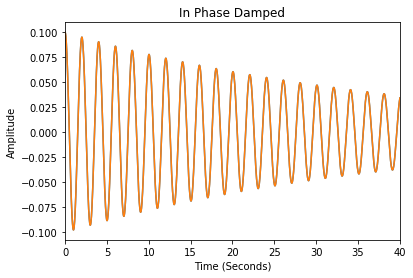

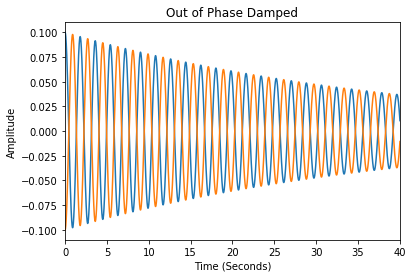

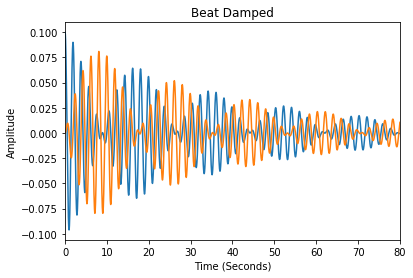

In [298]:
b = 0.05 #damping coefficient
k = 2.71;
alpha = (k*k*l*l)/(m*L*L)
beta = g/L

def f(y, t, alpha, beta, drag):
    phi1, v1, phi2, v2 = y
    
    dph1dt = v1
    dv1dt = (alpha*phi2) - (phi1*alpha) - (phi1*beta) - (b*v1)
    dph2dt = v2
    dv2dt = (alpha*phi1) - (alpha+beta)*phi2 - (b*v2)
    return [dph1dt, dv1dt, dph2dt, dv2dt]

damped_inphase = odeint(f, [0.1,0.0,0.1,0.0], timebase, args = (alpha,beta,b))
damped_outofphase = odeint(f, [0.1,0.0,-0.1,0.0], timebase, args = (alpha,beta,b))
damped_beat = odeint(f, [0.1,0.0,0.0,0.0], timebase, args = (alpha,beta,b))


axes = plt.gca()
axes.set_xlim([0,40])
plt.plot(timebase, damped_inphase[:,0], timebase, damped_inphase[:,2])
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('In Phase Damped')
plt.show()

axes = plt.gca()
axes.set_xlim([0,40])
plt.plot(timebase,damped_outofphase[:,0], timebase,damped_outofphase[:,2])
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('Out of Phase Damped')
plt.show()

axes = plt.gca()
axes.set_xlim([0,80])
plt.plot(timebase,damped_beat[:,0], timebase,damped_beat[:,2])
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('Beat Damped')
plt.show()

## Varying the Spring Constant

Let's set the distance of the spring from the pivot at $l = 0.4m$, and then vary the size of the spring constant and investigate it's effect on the signal.

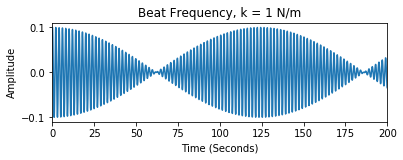

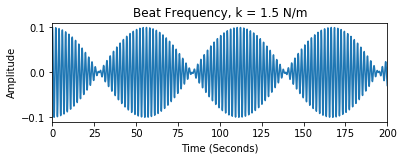

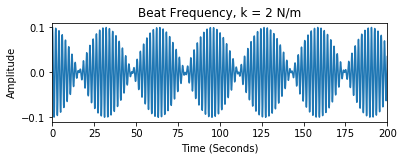

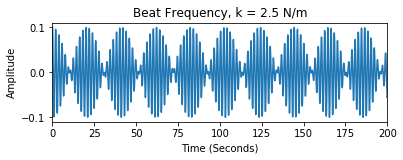

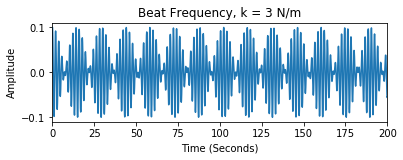

In [296]:
b = 0; #remove the damping coefficient from the differential equations
l = 0.4
k = 1;
alpha = (k*k*l*l)/(m*L*L)
beta = g/L

springconstant1 = odeint(f, [0.1,0.0,0.0,0.0], timebase, args = (alpha,beta,b))

k = 1.5;
alpha = (k*k*l*l)/(m*L*L)
beta = g/L

springconstant2 = odeint(f, [0.1,0.0,0.0,0.0], timebase, args = (alpha,beta,b))

k = 2;
alpha = (k*k*l*l)/(m*L*L)
beta = g/L

springconstant3 = odeint(f, [0.1,0.0,0.0,0.0], timebase, args = (alpha,beta,b))

k = 2.5;
alpha = (k*k*l*l)/(m*L*L)
beta = g/L

springconstant4 = odeint(f, [0.1,0.0,0.0,0.0], timebase, args = (alpha,beta,b))

k = 3;
alpha = (k*k*l*l)/(m*L*L)
beta = g/L

springconstant5 = odeint(f, [0.1,0.0,0.0,0.0], timebase, args = (alpha,beta,b))

plt.figure(1)
plt.subplot(211)
axes = plt.gca()
axes.set_xlim([0,200]) 
plt.plot(timebase, springconstant1[:,0])
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('Beat Frequency, k = 1 N/m')
plt.show()

plt.subplot(211)
axes = plt.gca()
axes.set_xlim([0,200]) 
plt.plot(timebase, springconstant2[:,0])
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('Beat Frequency, k = 1.5 N/m')
plt.show()

plt.subplot(211)
axes = plt.gca()
axes.set_xlim([0,200]) 
plt.plot(timebase, springconstant3[:,0])
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('Beat Frequency, k = 2 N/m')
plt.show()

plt.subplot(211)
axes = plt.gca()
axes.set_xlim([0,200]) 
plt.plot(timebase, springconstant4[:,0])
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('Beat Frequency, k = 2.5 N/m')
plt.show()

plt.subplot(211)
axes = plt.gca()
axes.set_xlim([0,200]) 
plt.plot(timebase, springconstant5[:,0])
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('Beat Frequency, k = 3 N/m')
plt.show()

## Analysis

It's clear from the plots that the lower the spring is along the length of the pivot arm, the higher the beating and out of phase frequencies. Because the spring is lower, the oscillations of the pendula stretch and compress the spring at greater lengths. Hence the spring exerts a higher force and creates a greater torque on each pendula. The higher force results in faster energy transfer from one pendula to the other. We can see this by taking notice of the Fourier transform plots of each beat frequency. There are two spikes in frequency, corresponding to the frequency of the pendulum oscillations and the frequency of energy transfer (the envelope of the beat signal). The higher spring force acting on the pendula shifts the frequency peak corresponding to energy transfer to a higher frequency.

There appears a secondary frequency peak in many of the in phase and out of phase setups in the experimental plots. This occurs because when the two pendula were released, it is difficult to have them properly in sync, and hence a slight beating effect will occur.

Something else to note about the experimental graphs is that the signals begin to decay. This energy loss is caused by the pendula masses being dragged by air molecules, friction between the bearings in the pivot point, and heat generation and loss of the spring as it's strethed and compressed. 

The introduction of a damping coefficient to the set of differential equations doesn't seem to affect the frequencies in the fourier transform. 

The higher the spring constant, the higher the frequency of the envelope in the beating modes. This occurs because the higher spring constant will generate larger forces when compressed and stretched, increasing the rate of energy transfer between the two pendula, similar to the effect of increasing the distance of the spring from the pivot point.